# The following notebook has been developed to study and apply linear regression on the wine quality dataset. The notebook also includes plots and figures that show the working of different regression models on the given dataset. Since regression deals with using attrbutes that have high correlation, a correlation matrix is also plotted that tells which attributes have the highest correlation and are suitable for the regression purposes. Finally in the later parts of the notebook all different regression techniques such as lasso, randomforest, decision tree, quadratic regressor are applied and their performance can be compared 

In [6]:
import pandas as pd
df = pd.read_csv('/home/shriansh/Downloads/winequality_red.csv')
df.columns = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar','Chlorides', 'Free Sulfur Dioxide', 'Total Sulfur Dioxide','Density', 'pH', 'Sulphates','Alcohol', 'Quality']
df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Pairplot of the 5 important attributes and their relationship.

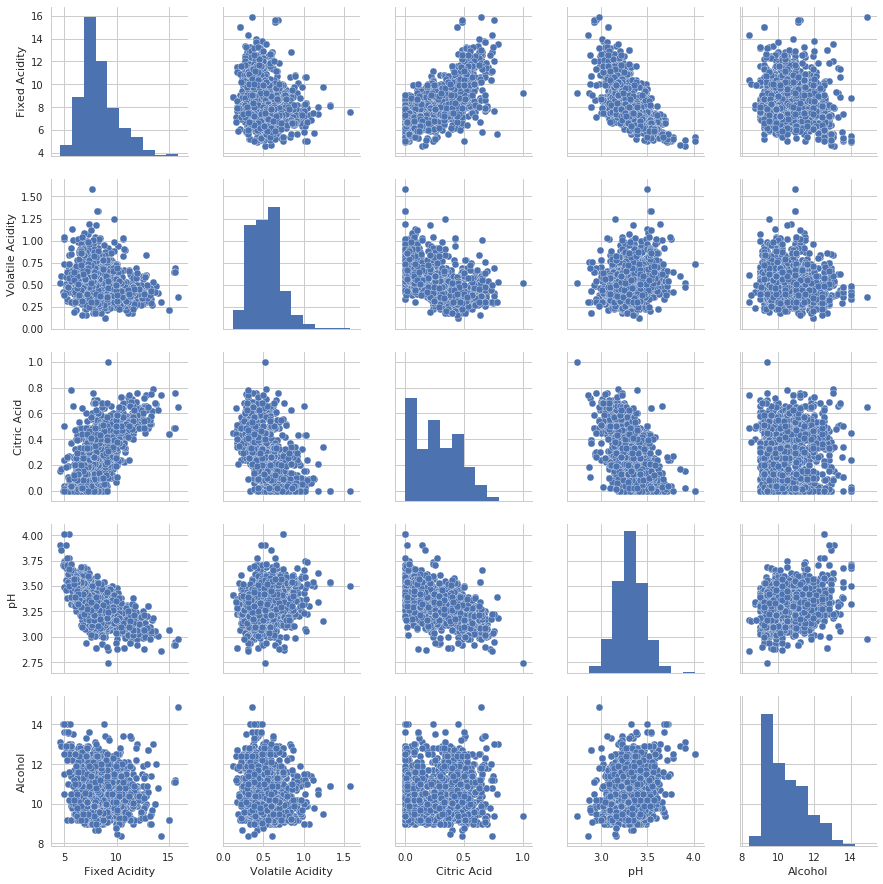

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'pH', 'Alcohol']
sns.pairplot(df[cols], size=2.5);
plt.show()

### Correlation matrix between the attribute value pairs. This matrix is very useful in finding the correlation between the attributes and helps you pick the important features that can be used for linear regression. 

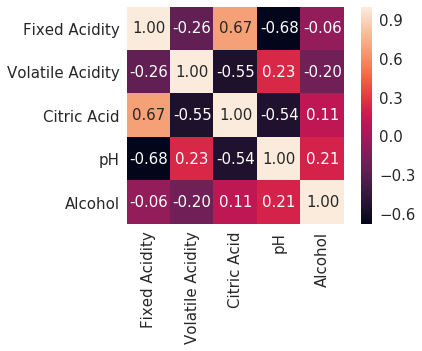

In [8]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
cbar=True,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size': 15},
yticklabels=cols,
xticklabels=cols)
plt.show()

### Creating the linear regression class. This forms the most important part of the notebook. Using the class we apply linear regression on our dataset.

In [9]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

### This is where we choose the two most correlated attributes for regression purposes. The standard scaling technique is applied so that the chosen attributes do not dominate or get supressed by each other. Thereafter linear regression class is executed in the final two lines

In [10]:
X = df[['Fixed Acidity']].values
y = df['Citric Acid'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD()
lr.fit(X_std, y_std)


/home/shriansh/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/shriansh/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


### Plot of sum of squared error against the number of iterations

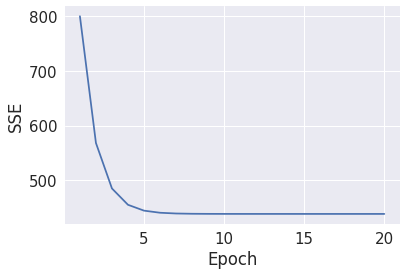

In [11]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [12]:
def lin_regplot(X, y, model):

    plt.scatter(X, y, c='blue')

    plt.plot(X, model.predict(X), color='red')

    return None

### The linear regression plot when Fixed Acidity and Citric Acid content are chosen as prime attributes. Here, the distance of each datapoint from the regression line should be least for better accuracy.

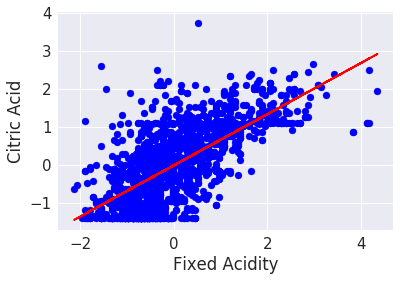

In [13]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.show()

In [14]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Citric Acid: %.3f" % \
    sc_y.inverse_transform(price_std))


Citric Acid: 0.022


/home/shriansh/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [15]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.672
Intercept: -0.000


### The following deals with finding the slope and intercept of the regression line formed.

In [16]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])

Slope: 0.075


In [17]:
print('Intercept: %.3f' % slr.intercept_)

Intercept: -0.354


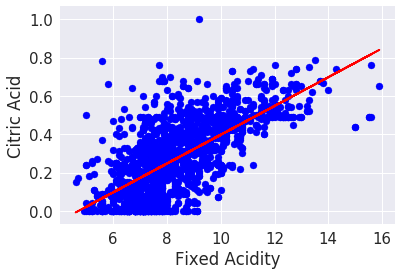

In [18]:
lin_regplot(X, y, slr)
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.show()

### Here we import the ransac regressor fro mthe skelarn library. It is greatly used for outlier detection i.e. when the dataset contains a few data points that are completely different from the majority set. Such data points are not considered while computing the solution and hence ransac regressor is great for working with noisy data

In [19]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
max_trials=100,
min_samples=50,
residual_metric=lambda x: np.sum(np.abs(x), axis=1),
residual_threshold=5.0,
random_state=0)
ransac.fit(X, y)

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x7f9c9186c1e0>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

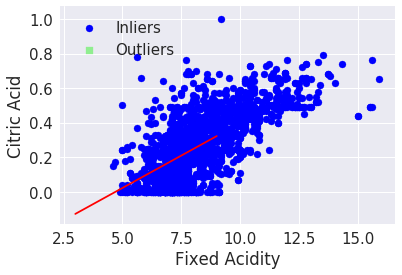

In [20]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.legend(loc='upper left')
plt.show()

In [21]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])


Slope: 0.075


In [22]:
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Intercept: -0.354


### sklearn library is imported for splitting the dataset into training and testing. The train-test split function here puts 70 % of data in training and remaining 30% in testing.

In [23]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['Quality'].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

/home/shriansh/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Scatter plot for the training and testing data

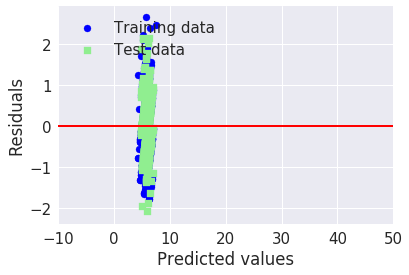

In [24]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

### Importing mean squared error function to compute the error rate and performance of the algorithm. Different errors such as r squared error mean squared error are computed for the algorithm used.

In [25]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))

MSE train: 0.426, test: 0.401


In [26]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
(r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)))

R^2 train: 0.371, test: 0.321


### Importing ridge, lasso and Elastic net regressor for the similar prediction task.

In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [29]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)

In [30]:



from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0,
320.0, 342.0, 368.0,
396.0, 446.0, 480.0,
586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
298.6, 314.2, 342.2,
360.8, 368.0, 391.2,
390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [31]:
lr.fit(X, y)
X_fit = np.arange(250,600,10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

### Comparing linear and qudratic fit for the regression task.

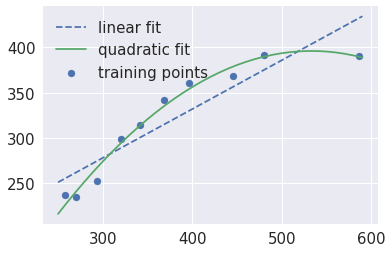

In [32]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit,
label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [33]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' % (
mean_squared_error(y, y_lin_pred),
mean_squared_error(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330


In [34]:
print('Training R^2 linear: %.3f, quadratic: %.3f' % (

r2_score(y, y_lin_pred),
r2_score(y, y_quad_pred)))

Training R^2 linear: 0.832, quadratic: 0.982


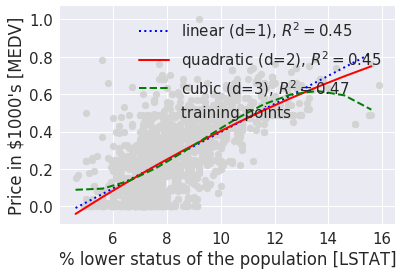

In [35]:
X = df[['Fixed Acidity']].values
y = df['Citric Acid'].values
regr = LinearRegression()
# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
# linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
# quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))
# plot results
plt.scatter(X, y,

label='training points',

color='lightgray')
plt.plot(X_fit, y_lin_fit,

label='linear (d=1), $R^2=%.2f$'

% linear_r2,

color='blue',

lw=2,

linestyle=':')
plt.plot(X_fit, y_quad_fit,

label='quadratic (d=2), $R^2=%.2f$'

% quadratic_r2,

color='red',

lw=2,

linestyle='-')


plt.plot(X_fit, y_cubic_fit,
label='cubic (d=3), $R^2=%.2f$'
% cubic_r2,
color='green',
lw=2,
linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

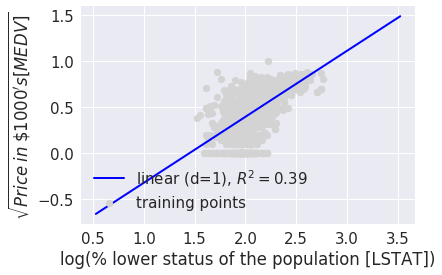

In [36]:
# transform features
X_log = np.log(X)

y_sqrt = np.sqrt(y)
# fit features
X_fit = np.arange(X_log.min()-1,

X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))
# plot results
plt.scatter(X_log, y_sqrt,

label='training points',

color='lightgray')
plt.plot(X_fit, y_lin_fit,

label='linear (d=1), $R^2=%.2f$' % linear_r2,

color='blue',

lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

### Using decision tree regressor for the task.

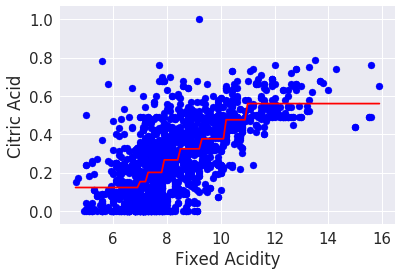

In [37]:
from sklearn.tree import DecisionTreeRegressor
X = df[['Fixed Acidity']].values
y = df['Citric Acid'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Fixed Acidity')
plt.ylabel('Citric Acid')
plt.show()

### Random Forest Regressor

In [38]:
X = df.iloc[:, :-1].values
y = df['Quality'].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,

test_size=0.4,

random_state=1)

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
n_estimators=1000,
criterion='mse',
random_state=1,
n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (
mean_squared_error(y_train, y_train_pred),
mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
r2_score(y_train, y_train_pred),
r2_score(y_test, y_test_pred)))

MSE train: 0.049, test: 0.351
R^2 train: 0.927, test: 0.443


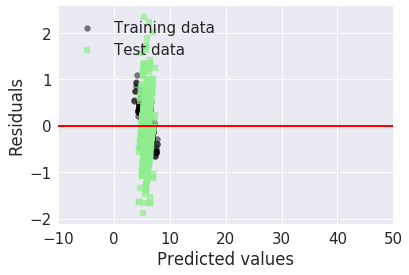

In [39]:
plt.scatter(y_train_pred,
y_train_pred - y_train,
c='black',
marker='o',
s=35,
alpha=0.5,
label='Training data')
plt.scatter(y_test_pred,
y_test_pred - y_test,
c='lightgreen',
marker='s',
s=35,
alpha=0.7,
label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()